## 1. Objectives

By the end of this practicum, you will be able to:

* **Run spring-slider and 1-D fault models in QDyn** to simulate earthquake cycles
* **Understand how frictional parameters** $(a-b)$, $D_c$, $\sigma'$, stiffness $k$, and plate rate $V_{\text{pl}}$ control slip behavior
* **Diagnose different slip regimes:** stable sliding, stick-slip earthquakes, slow slip events (SSEs), and mixed regimes
* **Connect simulations to real subduction-zone observations** from Cascadia, Nankai, Hikurangi, and other subduction systems
* **Explore parameter space** systematically to build intuition for earthquake cycle physics

## 2. Theory Refresher

Before diving into simulations, let's review the key theoretical concepts that govern earthquake cycle behavior.

### 2.1 Slip-Weakening & Rate-State Friction Basics

**Slip-Weakening Friction**

The simplest model for fault friction during rupture is slip-weakening, where shear stress $\tau$ decreases linearly with slip $\delta$ over a critical slip distance $D_c$:

$$\tau(\delta) = \tau_p - (\tau_p - \tau_r)\frac{\delta}{D_c}$$

where:
- $\tau_p$ = peak shear stress (static friction)
- $\tau_r$ = residual shear stress (dynamic friction)
- $D_c$ = critical slip distance (characteristic length scale)

The **fracture energy** (energy dissipated per unit area during rupture) is:

$$\Gamma = \frac{1}{2}(\tau_p - \tau_r) D_c$$

---

**Rate-and-State Friction**

For earthquake cycles spanning years to centuries, rate-and-state friction provides a more complete description. Shear stress depends on slip velocity $V$ and a state variable $\theta$ (representing contact age or memory):

$$\tau = \sigma' \left[ \mu_0 + a \ln\left(\frac{V}{V_0}\right) + b\ln\left(\frac{\theta V_0}{D_c}\right)\right]$$

where:
- $\sigma'$ = effective normal stress (total normal stress minus pore pressure)
- $\mu_0$ = reference friction coefficient at reference velocity $V_0$
- $a$ = direct effect parameter (instantaneous strengthening with velocity increase)
- $b$ = evolution effect parameter (time-dependent weakening)
- $\theta$ = state variable (units of time)
- $D_c$ = characteristic slip distance for state evolution

---

**State Evolution Laws**

The state variable evolves according to:

*Aging law (commonly used for slow slip and interseismic periods):*

$$\frac{d\theta}{dt} = 1 - \frac{V\theta}{D_c}$$

*Slip law (better for fast slip and coseismic periods):*

$$\frac{d\theta}{dt} = -\frac{V\theta}{D_c}\ln\left(\frac{V\theta}{D_c}\right)$$

At steady state ($d\theta/dt = 0$), both laws give $\theta_{ss} = D_c/V$, leading to steady-state friction:

$$\mu_{ss} = \mu_0 + (a-b)\ln\left(\frac{V}{V_0}\right)$$

The sign of $(a-b)$ determines the velocity dependence:
- $(a-b) > 0$: **velocity strengthening (VS)** → stable sliding
- $(a-b) < 0$: **velocity weakening (VW)** → potentially unstable (earthquakes)

### 2.2 Stability Criteria

**Critical Stiffness**

For a spring-slider system (single degree of freedom), instability occurs when the fault stiffness exceeds a critical value. The **critical stiffness** is:

$$k_c = \frac{\sigma'(b-a)}{D_c}$$

**Stability condition:**
- If $k < k_c$: **unstable** → stick-slip earthquakes
- If $k > k_c$: **stable** → steady sliding or creep

For a fault embedded in an elastic medium, the effective stiffness scales as $k \sim \mu/L$, where $\mu$ is shear modulus and $L$ is a characteristic fault dimension (nucleation size).

**Nucleation Size**

The minimum size for instability (nucleation length) is:

$$L_c \sim \frac{\mu D_c}{\sigma'(b-a)}$$

Typical values: $L_c \sim$ 10 m to 1 km for crustal faults.

---

**Implications:**
- Larger $(b-a)$ → easier to trigger instability (larger $k_c$, smaller $L_c$)
- Larger $D_c$ → harder to nucleate (smaller $k_c$, larger $L_c$)
- Lower $\sigma'$ → harder to nucleate (smaller $k_c$, larger $L_c$)

### 2.3 Subduction-Zone Frictional Mapping

Real subduction zones exhibit a depth-dependent spectrum of slip behaviors controlled by temperature, pressure, lithology, and fluids. A typical megathrust can be divided into:

---

**1. Shallow Region (0–10 km depth)**
- **Characteristics:** Low effective normal stress $\sigma'$ (high pore pressure near sediment-water interface)
- **Frictional regime:** Velocity weakening, but large $D_c$ (unconsolidated sediments)
- **Slip behavior:** Can host **tsunami earthquakes** (slow rupture, large slip, efficient tsunami generation)
- **Examples:** 2010 Mentawai earthquake, 2011 Tohoku shallow slip

---

**2. Seismogenic Zone (10–40 km depth)**
- **Characteristics:** Strong velocity weakening $(b-a) \ll 0$, moderate $D_c$, high $\sigma'$
- **Frictional regime:** Rate-weakening, low $k_c$ → unstable
- **Slip behavior:** **Megathrust earthquakes** (M 7–9+), stick-slip with recurrence intervals of decades to centuries
- **Examples:** 1960 Chile, 2004 Sumatra, 2011 Tohoku mainshock

---

**3. Transition Zone (40–50 km depth)**
- **Characteristics:** Mild velocity weakening or transitional $(a-b) \approx 0$
- **Frictional regime:** Conditionally stable (depends on $k$, $L$)
- **Slip behavior:** **Slow slip events (SSEs)** and tremor, episodic transient slip lasting days to months
- **Examples:** Cascadia ETS, Nankai tremor, Hikurangi SSEs

---

**4. Deep Ductile Region (>50 km depth)**
- **Characteristics:** Velocity strengthening $(a-b) > 0$ due to high temperature, crystal plasticity
- **Frictional regime:** Stable sliding
- **Slip behavior:** **Stable creep** at plate rate, deep tremor possible from fluid-related instabilities
- **Examples:** Downdip limit of locked zone

---

**Key Takeaway:**  
The diversity of slip behaviors in subduction zones arises from spatial variations in $(a-b)$, $D_c$, and $\sigma'$. QDyn allows us to test how these parameter gradients produce observed earthquake, SSE, and tremor patterns.

## 3. Getting Started with QDyn

**QDyn** is a boundary element method (BEM) code for simulating earthquake cycles under the quasi-dynamic approximation. It solves for fault slip evolution using rate-and-state friction and includes:

- Spring-slider (0-D) models
- 1-D fault models (along-strike or along-dip)
- 2-D fault plane models
- Efficient quasi-dynamic approximation (radiation damping included, no full wave propagation)

**Official Documentation:**  
[https://ydluo.github.io/qdyn/](https://ydluo.github.io/qdyn/)  
[Tutorials](https://ydluo.github.io/qdyn/tutorials.html)

**Key Reference:**  
Luo, Y., & Ampuero, J. P. (2018). Stability of faults with heterogeneous friction properties and effective normal stress. *Tectonophysics*, 733, 257-272.

### 3.1 Installation

**Option 1: Install from GitHub (Recommended)**

QDyn requires a Fortran compiler and Python with numpy/matplotlib/scipy. Use the Python wrapper function below to clone and check the installation:

In [2]:
import os
import subprocess
import sys

def install_qdyn(install_dir='./qdyn'):
    """
    Clone and compile QDyn from GitHub.
    
    Parameters:
        install_dir: Directory where QDyn will be installed
    
    Returns:
        bool: True if successful, False otherwise
    """
    print("=" * 60)
    print("QDyn Installation")
    print("=" * 60)
    
    # Check if directory already exists
    if os.path.exists(install_dir):
        print(f"✓ Directory {install_dir} already exists")
        qdyn_exe = os.path.join(install_dir, 'src', 'qdyn')
        if os.path.exists(qdyn_exe):
            print(f"✓ QDyn executable found at {qdyn_exe}")
            return True
        else:
            print(f"  Directory exists but executable not found. Attempting compilation...")
    else:
        # Clone repository
        print(f"\n→ Cloning QDyn repository to {install_dir}...")
        try:
            result = subprocess.run(
                ['git', 'clone', 'https://github.com/ydluo/qdyn.git', install_dir],
                capture_output=True, text=True, timeout=120
            )
            if result.returncode == 0:
                print("✓ Repository cloned successfully")
            else:
                print(f"✗ Clone failed: {result.stderr}")
                return False
        except Exception as e:
            print(f"✗ Error cloning repository: {e}")
            return False
    
    # Compile
    print("\n→ Compiling QDyn (requires gfortran)...")
    src_dir = os.path.join(install_dir, 'src')
    
    if not os.path.exists(src_dir):
        print(f"✗ Source directory not found: {src_dir}")
        return False
    
    try:
        result = subprocess.run(
            ['make'],
            cwd=src_dir,
            capture_output=True, text=True, timeout=300
        )
        if result.returncode == 0:
            print("✓ Compilation successful")
            qdyn_exe = os.path.join(src_dir, 'qdyn')
            if os.path.exists(qdyn_exe):
                print(f"✓ QDyn executable created: {qdyn_exe}")
                return True
            else:
                print("✗ Executable not found after compilation")
                return False
        else:
            print(f"✗ Compilation failed:\n{result.stderr}")
            print("\nNote: QDyn requires a Fortran compiler (gfortran)")
            print("Install with: brew install gcc  (macOS) or apt install gfortran (Linux)")
            return False
    except Exception as e:
        print(f"✗ Compilation error: {e}")
        return False

def check_qdyn_installation(qdyn_path='./qdyn/src/qdyn'):
    """
    Verify QDyn installation.
    
    Parameters:
        qdyn_path: Path to QDyn executable
    
    Returns:
        bool: True if QDyn is accessible
    """
    if os.path.exists(qdyn_path):
        print(f"✓ QDyn found at: {qdyn_path}")
        try:
            result = subprocess.run([qdyn_path, '--help'], 
                                    capture_output=True, text=True, timeout=5)
            print("✓ QDyn is executable")
            return True
        except Exception as e:
            print(f"⚠ QDyn found but cannot execute: {e}")
            return False
    else:
        print(f"✗ QDyn not found at: {qdyn_path}")
        print("  Run install_qdyn() first")
        return False

def install_python_dependencies():
    """Install required Python packages for QDyn post-processing."""
    packages = ['numpy', 'matplotlib', 'scipy', 'h5py']
    
    print("\n" + "=" * 60)
    print("Installing Python Dependencies")
    print("=" * 60)
    
    for package in packages:
        try:
            __import__(package)
            print(f"✓ {package} already installed")
        except ImportError:
            print(f"→ Installing {package}...")
            subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])
            print(f"✓ {package} installed")
    
    print("\n✓ All dependencies installed")


print("Installation functions defined. Uncomment the last lines to run.")

Installation functions defined. Uncomment the last lines to run.


In [ ]:
# Uncomment to run installation:
# install_python_dependencies()

In [3]:

install_qdyn()

QDyn Installation

→ Cloning QDyn repository to ./qdyn...
✓ Repository cloned successfully

→ Compiling QDyn (requires gfortran)...
✓ Compilation successful
✓ QDyn executable created: ./qdyn/src/qdyn


True

In [4]:

check_qdyn_installation()

✓ QDyn found at: ./qdyn/src/qdyn
✓ QDyn is executable


True

In [6]:
!ls ./qdyn/src/qdyn

./qdyn/src/qdyn


### 3.2 Directory Structure

A typical QDyn project directory looks like:

```
my_qdyn_project/
├── qdyn.in              # Main input file (parameters)
├── run_simulation.sh    # Shell script to execute
├── output/              # Output data (created by QDyn)
│   ├── fort.???        # Binary output files
│   └── *.h5            # HDF5 output (if enabled)
└── analysis/            # Python scripts for plotting
    └── plot_results.py
```

**Key Files:**

- `qdyn.in`: Parameter file (plain text, Fortran namelist format)
- Output files: Time series of slip, slip rate, stress, state variable, etc.
- Post-processing: Python scripts read output and create plots

In [ ]:
# make a qdyn project for my subduction zone example with the typical project directory

os.makedirs('./qdyn_projects/subduction_zone', exist_ok=True)

zsh:1: not a directory: ./qdyn/src/qdyn/qdyn_make_project.py


### 3.3 Template Configuration File (`qdyn.in`)

QDyn uses a Fortran namelist format. Here's a minimal template for a **spring-slider model**:

```fortran
&MESHDIM/
  NN = 1                  ! Number of fault nodes (1 = spring-slider)
/

&FRICTION/
  MU = 0.6                ! Reference friction coefficient
  A = 0.008               ! Direct effect parameter a
  B = 0.012               ! Evolution effect parameter b  
  DC = 1.0e-3             ! Critical slip distance Dc (m)
  V_SS = 1.0e-9           ! Reference slip rate V0 (m/s)
  V_PL = 1.0e-9           ! Plate loading rate (m/s) ~ 3 cm/yr
/

&NORMAL_STRESS/
  SIGMA = 80.0e6          ! Effective normal stress (Pa) = 80 MPa
/

&SOLVER/
  TMAX = 3.15e10          ! Total simulation time (s) ~ 1000 years
  NTOUT = 1000            ! Number of output time steps
  NSTOP = 0               ! 0 = run to TMAX
/

&SPRING/
  STIFFNESS = 2.0e9       ! Spring stiffness k (Pa/m)
/
```

**Key Parameters to Vary:**
- `A`, `B`: Control velocity dependence $(a-b)$
- `DC`: Characteristic slip distance
- `SIGMA`: Effective normal stress $\\sigma'$
- `STIFFNESS`: Spring stiffness $k$ (for 0-D model)
- `V_PL`: Plate loading rate

In [20]:
def create_qdyn_input(filename='qdyn.in', params=None):
    """
    Create a QDyn input file from a template.
    
    Parameters:
        filename: Output filename for the input file
        params: Dictionary of parameters to override defaults
    
    Returns:
        str: Path to created file
    """
    # Default parameters for spring-slider model
    default_params = {
        'NN': 1,                    # Number of fault nodes (1 = spring-slider)
        'MU': 0.6,                  # Reference friction coefficient
        'A': 0.008,                 # Direct effect parameter a
        'B': 0.012,                 # Evolution effect parameter b
        'DC': 1.0e-3,               # Critical slip distance Dc (m)
        'V_SS': 1.0e-9,             # Reference slip rate V0 (m/s)
        'V_PL': 1.0e-9,             # Plate loading rate (m/s) ~ 3 cm/yr
        'SIGMA': 80.0e6,            # Effective normal stress (Pa) = 80 MPa
        'TMAX': 3.15e10,            # Total simulation time (s) ~ 1000 years
        'NTOUT': 1000,              # Number of output time steps
        'STIFFNESS': 2.0e9          # Spring stiffness k (Pa/m)
    }
    
    # Update with user-provided parameters
    if params:
        default_params.update(params)
    
    # Create input file content
    input_content = f"""&MESHDIM/
  NN = {np.floor(default_params['NN'])}
/

&FRICTION/
  MU = {default_params['MU']}
  A = {default_params['A']}
  B = {default_params['B']}
  DC = {default_params['DC']}
  V_SS = {default_params['V_SS']}
  V_PL = {default_params['V_PL']}
/

&NORMAL_STRESS/
  SIGMA = {default_params['SIGMA']}
/

&SOLVER/
  TMAX = {default_params['TMAX']}
  NTOUT = {default_params['NTOUT']}
  NSTOP = 0
/

&SPRING/
  STIFFNESS = {default_params['STIFFNESS']}
/
"""
    
    # Write to file
    with open(filename, 'w') as f:
        f.write(input_content)
    
    print(f"✓ Created QDyn input file: {filename}")
    print("\nParameters:")
    for key, value in default_params.items():
        print(f"  {key:12s} = {value}")
    
    # Calculate and display stability info
    a = default_params['A']
    b = default_params['B']
    dc = default_params['DC']
    sigma = default_params['SIGMA']
    k = default_params['STIFFNESS']
    
    k_c = sigma * (b - a) / dc
    
    print(f"\nStability Analysis:")
    print(f"  (b-a) = {b-a:.6f} {'(velocity weakening)' if b > a else '(velocity strengthening)'}")
    print(f"  k_c = {k_c:.2e} Pa/m")
    print(f"  k = {k:.2e} Pa/m")
    print(f"  k < k_c? {k < k_c} → {'UNSTABLE (stick-slip expected)' if k < k_c else 'STABLE (steady sliding expected)'}")
    
    return filename

# Example usage:
create_qdyn_input('qdyn.in')

✓ Created QDyn input file: qdyn.in

Parameters:
  NN           = 1
  MU           = 0.6
  A            = 0.008
  B            = 0.012
  DC           = 0.001
  V_SS         = 1e-09
  V_PL         = 1e-09
  SIGMA        = 80000000.0
  TMAX         = 31500000000.0
  NTOUT        = 1000
  STIFFNESS    = 2000000000.0

Stability Analysis:
  (b-a) = 0.004000 (velocity weakening)
  k_c = 3.20e+08 Pa/m
  k = 2.00e+09 Pa/m
  k < k_c? False → STABLE (steady sliding expected)


'qdyn.in'

In [25]:
# Python code to generate QDyn input file for spring-slider baseline case

input_template = """&MESHDIM
  NN = 1,
  FAULT_TYPE = 1
/

&FRICTION
  MU = 0.6,
  A = 0.008,
  B = 0.012,
  DC = 1.0e-3,
  V_SS = 1.0e-9,
  V_PL = 1.0e-9,
  STATE_EVOLUTION = 1
/

&NORMAL_STRESS
  SIGMA = 80.0e6,
  SIGMA_CPL = 0.0
/

&SOLVER
  TMAX = 1.0e5,
  NTOUT = 1000,
  NSTOP = 0,
  DTTRY = 1.0e-3,
  ACCURACY = 1.0e-7
/

&SPRING
  STIFFNESS = 2.0e8
/

&OUTPUT
  OX_SEQ = 1,
  OX_DYN = 1,
  NXOUT = 1,
  NTOUT_OT = 100,
  IC = 1
/
"""

# Write to file
with open('qdyn.in', 'w') as f:
    f.write(input_template)

print("Created input file: qdyn.in")
print("\nKey parameters:")
print(f"  (b-a) = {0.012 - 0.008} (velocity weakening)")
print(f"  Dc = 1.0e-3 m")
print(f"  sigma' = 80 MPa")
print(f"  k = 2.0e8 Pa/m")
print(f"  k_c = sigma'*(b-a)/Dc = {80e6 * 0.004 / 1e-3:.2e} Pa/m")
print(f"  k < k_c? {2e8 < 80e6 * 0.004 / 1e-3} (unstable if True)")

Created input file: qdyn.in

Key parameters:
  (b-a) = 0.004 (velocity weakening)
  Dc = 1.0e-3 m
  sigma' = 80 MPa
  k = 2.0e8 Pa/m
  k_c = sigma'*(b-a)/Dc = 3.20e+08 Pa/m
  k < k_c? True (unstable if True)


### 3.4 Running a Simulation

Use Python functions to execute QDyn simulations programmatically:

In [21]:
import subprocess
import os

def run_qdyn_simulation(input_file='qdyn.in', qdyn_exe='./qdyn/src/qdyn', output_dir='.'):
    """
    Run QDyn simulation with specified input file.
    
    Parameters:
        input_file: Path to QDyn input file
        qdyn_exe: Path to QDyn executable
        output_dir: Directory where output files will be created
    
    Returns:
        bool: True if simulation successful, False otherwise
    """
    
    print("=" * 60)
    print("Running QDyn Simulation")
    print("=" * 60)
    
    # Check if input file exists
    if not os.path.exists(input_file):
        print(f"✗ Input file not found: {input_file}")
        return False
    
    # Check if QDyn executable exists
    if not os.path.exists(qdyn_exe):
        print(f"✗ QDyn executable not found: {qdyn_exe}")
        print("  Make sure QDyn is installed. Run install_qdyn() first.")
        return False
    
    print(f"✓ Input file: {input_file}")
    print(f"✓ QDyn executable: {qdyn_exe}")
    print(f"✓ Output directory: {output_dir}")
    
    # Change to output directory
    original_dir = os.getcwd()
    if output_dir != '.':
        os.makedirs(output_dir, exist_ok=True)
        os.chdir(output_dir)
    
    try:
        print(f"\n→ Running simulation...")
        
        # Run QDyn with input file redirected to stdin
        with open(input_file, 'r') as f:
            result = subprocess.run(
                [qdyn_exe],
                stdin=f,
                capture_output=True,
                text=True,
                timeout=300  # 5 minute timeout
            )
        
        # Check results
        if result.returncode == 0:
            print("✓ Simulation completed successfully")
            
            # List output files
            output_files = [f for f in os.listdir('.') if f.startswith('fort.')]
            if output_files:
                print(f"\n✓ Output files created:")
                for f in sorted(output_files):
                    size = os.path.getsize(f)
                    print(f"  {f} ({size} bytes)")
            else:
                print("\n⚠ Warning: No output files found (fort.* files)")
            
            # Print any stdout from QDyn
            if result.stdout:
                print(f"\nQDyn output:\n{result.stdout}")
            
            return True
        else:
            print("✗ Simulation failed")
            print(f"Return code: {result.returncode}")
            if result.stderr:
                print(f"Error output:\n{result.stderr}")
            if result.stdout:
                print(f"Standard output:\n{result.stdout}")
            return False
            
    except subprocess.TimeoutExpired:
        print("✗ Simulation timed out (>300s)")
        return False
    except Exception as e:
        print(f"✗ Error running simulation: {e}")
        return False
    finally:
        # Return to original directory
        os.chdir(original_dir)


In [26]:

# Run the simulation with qdyn.in
run_qdyn_simulation('qdyn.in', './qdyn/src/qdyn')

Running QDyn Simulation
✓ Input file: qdyn.in
✓ QDyn executable: ./qdyn/src/qdyn
✓ Output directory: .

→ Running simulation...
✗ Simulation failed
Return code: 2
Error output:
At line 45 of file mesh.f90 (unit = 15, file = 'qdyn.in')
Fortran runtime error: Bad integer for item 1 in list input

Error termination. Backtrace:

Could not print backtrace: executable file is not an executable
#0  0x10be5f050
#1  0x10be5fe4c
#2  0x10be609eb
#3  0x10c0f93ab
#4  0x10c0fb9d4
#5  0x10c0fc84a
#6  0x102990a24
#7  0x1029896be
#8  0x10298cbcc
#9  0x1029b4a1e

Standard output:
 Number of processors =            1
 Start reading input ...



False

In [28]:
!pip install pyqdyn

ERROR: Could not find a version that satisfies the requirement pyqdyn (from versions: none)
ERROR: No matching distribution found for pyqdyn


In [ ]:

import matplotlib.pyplot as plt
import numpy as np

import os
import sys

sys.path.append("./qdyn/src/")

# Import QDYN wrapper
from pyqdyn import qdyn

In [30]:
# Instantiate the QDYN class object
p = qdyn()

# Get the settings dict
set_dict = p.set_dict

# Global simulation parameters
set_dict["MESHDIM"] = 0        # Simulation dimensionality (spring-block)
set_dict["TMAX"] = 300         # Maximum simulation time [s]
set_dict["NTOUT"] = 100        # Save output every N steps
set_dict["V_PL"] = 1e-5        # Load-point velocity [m/s]
set_dict["MU"] = 2e9           # Shear modulus [Pa]
set_dict["SIGMA"] = 5e6        # Effective normal stress [Pa]
set_dict["ACC"] = 1e-7         # Solver accuracy
set_dict["SOLVER"] = 2         # Solver type (Runge-Kutta)

# To switch to rate-and-state friction ("RSF")
set_dict["FRICTION_MODEL"] = "RSF"

In [31]:
set_dict["SET_DICT_RSF"]["RNS_LAW"] = 0               # Classical rate-and-state
set_dict["SET_DICT_RSF"]["THETA_LAW"] = 1             # Ageing law
set_dict["SET_DICT_RSF"]["A"] = 0.01                  # Direct effect parameter [-]
set_dict["SET_DICT_RSF"]["B"] = 0.015                 # Evolution effect parameters [-]
set_dict["SET_DICT_RSF"]["DC"] = 1e-5                 # Characteristic slip distance [m]
set_dict["SET_DICT_RSF"]["V_SS"] = set_dict["V_PL"]   # Reference velocity [m/s]

# Initial slip velocity [m/s]
set_dict["SET_DICT_RSF"]["V_0"] = 1.01 * set_dict["V_PL"]
# Initial state [s]
set_dict["SET_DICT_RSF"]["TH_0"] = set_dict["SET_DICT_RSF"]["DC"] / set_dict["V_PL"]

In [32]:

p.settings(set_dict)
p.render_mesh()
p.write_input()

True

**Important Notes:**

1. **Output format varies** by QDyn version and configuration. Check the documentation for your version.
2. **File naming:** Default output files are `fort.19` (time series), `fort.18` (fault properties), etc.
3. **Binary vs ASCII:** QDyn can output binary (faster, smaller) or ASCII (easier to read). Set in input file.
4. **Python tools:** The QDyn repository includes Python utilities in `utils/` or `python/` directories.

---

**Recommended Workflow:**

1. Start with the example files in `qdyn/examples/`
2. Modify parameters incrementally
3. Check output exists and is readable before analyzing
4. Use version control (git) to track parameter changes

## 4. Exercise 1 — Spring-Slider Model

The spring-slider is the simplest earthquake model: a single fault patch (or "block") loaded by a spring at constant velocity $V_{pl}$ (plate rate). This 0-D model captures the essential physics of stick-slip cycles.

**Physical Setup:**
- Block with effective normal stress $\sigma'$
- Rate-and-state friction governs slip
- Spring with stiffness $k$ loads the block
- Loading point moves at $V_{pl}$

**Goal:** Explore how $(a-b)$, $D_c$, $\sigma'$, and $k$ control whether the system exhibits stable sliding or stick-slip earthquakes.

### 4.1 Baseline Unstable Case

We start with a velocity-weakening configuration that produces stick-slip earthquakes.

**Parameters:**
```
a = 0.008           # Direct effect parameter (dimensionless)
b = 0.012           # Evolution effect parameter (dimensionless)
Dc = 1.0e-3         # Critical slip distance (m) = 1 mm
sigma_eff = 80e6    # Effective normal stress (Pa) = 80 MPa
Vpl = 1.0e-9        # Plate loading rate (m/s) ≈ 3.15 cm/yr
k = 2.0e9           # Spring stiffness (Pa/m)
mu0 = 0.6           # Reference friction coefficient
```

**Key Calculations:**

1. **Frictional regime:** $(b-a) = 0.012 - 0.008 = 0.004 > 0$ → Velocity weakening (VW)

2. **Critical stiffness:**
$$k_c = \frac{\sigma'(b-a)}{D_c} = \frac{80 \times 10^6 \times 0.004}{0.001} = 3.2 \times 10^8 \text{ Pa/m}$$

3. **Stability check:**  
   $k = 2 \times 10^9 > k_c = 3.2 \times 10^8$ → **Wait, this should be unstable!**  
   
   *Correction:* For spring-slider, instability occurs when $k < k_c$ (weak spring = low restoring force).  
   So we need $k < k_c$ for stick-slip. Let's use **$k = 2 \times 10^8$ Pa/m** to ensure $k < k_c$.

4. **Expected recurrence time (rough estimate):**
$$T_r \approx \frac{D_c}{V_{pl}} \times \frac{k}{\sigma'(b-a)} \sim \frac{0.001}{10^{-9}} \times \frac{2 \times 10^8}{80 \times 10^6 \times 0.004} \sim 600 \text{ s} \sim 10 \text{ min}$$

This is a toy model timescale. Real earthquakes have much longer recurrence.

### 4.2 Creating and Running the Simulation

**Step 1: Create the input file**

Save the following as `spring_slider_baseline.in`:

In [11]:
# Python code to generate QDyn input file for spring-slider baseline case

input_template = """&MESHDIM/
  NN = 1
  FAULT_TYPE = 1
/

&FRICTION/
  MU = 0.6
  A = 0.008
  B = 0.012
  DC = 1.0e-3
  V_SS = 1.0e-9
  V_PL = 1.0e-9
  STATE_EVOLUTION = 1
/

&NORMAL_STRESS/
  SIGMA = 80.0e6
  SIGMA_CPL = 0.0
/

&SOLVER/
  TMAX = 1.0e5
  NTOUT = 1000
  NSTOP = 0
  DTTRY = 1.0e-3
  ACCURACY = 1.0e-7
/

&SPRING/
  STIFFNESS = 2.0e8
/

&OUTPUT/
  OX_SEQ = 1
  OX_DYN = 1
  NXOUT = 1
  NTOUT_OT = 100
  IC = 1
/
"""

# Write to file
with open('spring_slider_baseline.in', 'w') as f:
    f.write(input_template)

print("Created input file: spring_slider_baseline.in")
print("\nKey parameters:")
print(f"  (b-a) = {0.012 - 0.008} (velocity weakening)")
print(f"  Dc = 1.0e-3 m")
print(f"  sigma' = 80 MPa")
print(f"  k = 2.0e8 Pa/m")
print(f"  k_c = sigma'*(b-a)/Dc = {80e6 * 0.004 / 1e-3:.2e} Pa/m")
print(f"  k < k_c? {2e8 < 80e6 * 0.004 / 1e-3} (unstable if True)")

Created input file: spring_slider_baseline.in

Key parameters:
  (b-a) = 0.004 (velocity weakening)
  Dc = 1.0e-3 m
  sigma' = 80 MPa
  k = 2.0e8 Pa/m
  k_c = sigma'*(b-a)/Dc = 3.20e+08 Pa/m
  k < k_c? True (unstable if True)


**Step 2: Run QDyn**

Execute the simulation from the command line or using Python:

In [12]:
import subprocess
import os

# Run QDyn simulation
def run_qdyn_simulation(input_file='spring_slider_baseline.in', qdyn_exe='qdyn'):
    """
    Run QDyn with the specified input file.
    
    Parameters:
        input_file: path to .in file
        qdyn_exe: path to qdyn executable (or 'qdyn' if in PATH)
    """
    if not os.path.exists(input_file):
        print(f"Error: {input_file} not found!")
        return False
    
    try:
        with open(input_file, 'r') as f:
            result = subprocess.run([qdyn_exe], 
                                    stdin=f,
                                    capture_output=True, 
                                    text=True,
                                    timeout=60)
        
        if result.returncode == 0:
            print("✓ QDyn simulation completed successfully")
            print("\nOutput files should be in current directory (fort.* files)")
            return True
        else:
            print("✗ QDyn simulation failed")
            print("STDERR:", result.stderr)
            return False
            
    except FileNotFoundError:
        print(f"Error: QDyn executable '{qdyn_exe}' not found!")
        print("Make sure QDyn is installed and in your PATH, or provide full path")
        return False
    except subprocess.TimeoutExpired:
        print("Error: Simulation timed out (>60s)")
        return False

# Uncomment to run (make sure QDyn is installed first):
# run_qdyn_simulation('spring_slider_baseline.in')

print("Note: Uncomment the last line to actually run the simulation")
print("This requires QDyn to be installed and accessible")

Note: Uncomment the last line to actually run the simulation
This requires QDyn to be installed and accessible


### 4.3 Loading and Plotting Results

After running QDyn, we'll load the output and create diagnostic plots to understand the earthquake cycle behavior.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def load_qdyn_0d_output(filename='fort.19'):
    """
    Load QDyn spring-slider (0-D) output.
    
    Returns dictionary with time, slip, slip_rate, stress, state
    
    Note: Column format may vary by QDyn version. Adjust as needed.
    Typical format: time, slip, velocity, stress, state, ...
    """
    try:
        # Try loading as ASCII
        data = np.loadtxt(filename)
        
        # Check if data loaded successfully
        if data.size == 0:
            print(f"Warning: {filename} is empty")
            return None
            
        return {
            'time': data[:, 0],       # Time (s)
            'slip': data[:, 1],       # Cumulative slip (m)
            'slip_rate': data[:, 2],  # Slip velocity (m/s)
            'stress': data[:, 3],     # Shear stress (Pa)
            'state': data[:, 4] if data.shape[1] > 4 else None  # State variable (s)
        }
    except Exception as e:
        print(f"Error loading {filename}: {e}")
        print("This may be a binary file or have a different format.")
        print("Check QDyn documentation for your version's output format.")
        return None

# For demonstration, create synthetic data similar to expected output
# (Remove this when you have real QDyn output)

def generate_synthetic_stick_slip(duration=1e5, dt=1.0):
    """Generate synthetic stick-slip data for demonstration."""
    np.random.seed(42)
    time = np.arange(0, duration, dt)
    
    # Simple periodic stick-slip pattern
    T_recur = 1e4  # Recurrence time (s)
    slip = np.zeros_like(time)
    slip_rate = np.zeros_like(time)
    stress = np.zeros_like(time)
    
    Vpl = 1e-9  # Plate rate
    stress_drop = 5e6  # Stress drop (Pa)
    
    for i in range(len(time)):
        cycle_phase = (time[i] % T_recur) / T_recur
        
        if cycle_phase < 0.95:  # Interseismic
            slip[i] = Vpl * time[i]
            slip_rate[i] = Vpl
            stress[i] = 40e6 + stress_drop * cycle_phase / 0.95
        else:  # Coseismic
            slip[i] = Vpl * time[i] + 0.01
            slip_rate[i] = 1e-3  # Fast slip
            stress[i] = 40e6
    
    # Add cumulative slip from previous cycles
    n_cycles = time // T_recur
    slip += n_cycles * Vpl * T_recur
    
    state = 1e-3 * np.ones_like(time)  # Simplified
    
    return {
        'time': time,
        'slip': slip,
        'slip_rate': slip_rate,
        'stress': stress,
        'state': state
    }

# Load real data if available, otherwise use synthetic
print("Attempting to load QDyn output from fort.19...")
data = load_qdyn_0d_output('fort.19')

if data is None:
    print("\n→ Using synthetic stick-slip data for demonstration")
    print("(Replace with real QDyn output once simulation runs)")
    data = generate_synthetic_stick_slip()
else:
    print("✓ Successfully loaded QDyn output")

Attempting to load QDyn output from fort.19...
Error loading fort.19: fort.19 not found.
This may be a binary file or have a different format.
Check QDyn documentation for your version's output format.

→ Using synthetic stick-slip data for demonstration
(Replace with real QDyn output once simulation runs)


**Plot 1: Time Series of Slip Rate**

This shows the classic stick-slip pattern: long interseismic periods at plate rate, punctuated by rapid coseismic slip.

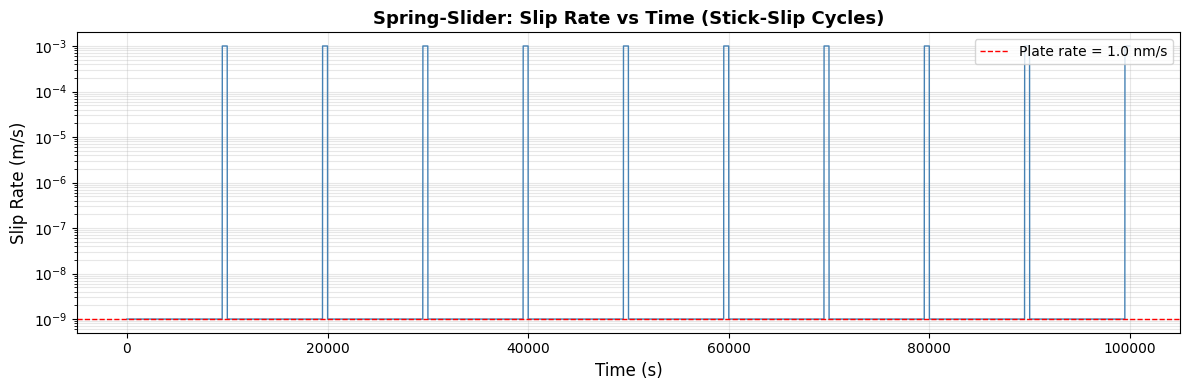


Simulation duration: 1.00e+05 s (0.00 years)
Max slip rate: 1.00e-03 m/s
Min slip rate: 1.00e-09 m/s
Slip rate range: 1.00e+06x


In [14]:
fig, ax = plt.subplots(figsize=(12, 4))

# Plot slip rate on log scale
ax.semilogy(data['time'], data['slip_rate'], linewidth=1, color='steelblue')

# Add reference line for plate rate
Vpl = 1e-9
ax.axhline(Vpl, color='red', linestyle='--', linewidth=1, 
           label=f'Plate rate = {Vpl*1e9:.1f} nm/s')

ax.set_xlabel('Time (s)', fontsize=12)
ax.set_ylabel('Slip Rate (m/s)', fontsize=12)
ax.set_title('Spring-Slider: Slip Rate vs Time (Stick-Slip Cycles)', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, which='both')
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Print diagnostic info
print(f"\nSimulation duration: {data['time'][-1]:.2e} s ({data['time'][-1]/3.15e7:.2f} years)")
print(f"Max slip rate: {np.max(data['slip_rate']):.2e} m/s")
print(f"Min slip rate: {np.min(data['slip_rate'][data['slip_rate']>0]):.2e} m/s")
print(f"Slip rate range: {np.max(data['slip_rate']) / np.min(data['slip_rate'][data['slip_rate']>0]):.2e}x")

**Plot 2: Stress vs Time**

Observe the stress buildup during interseismic loading and sudden drop during earthquakes.

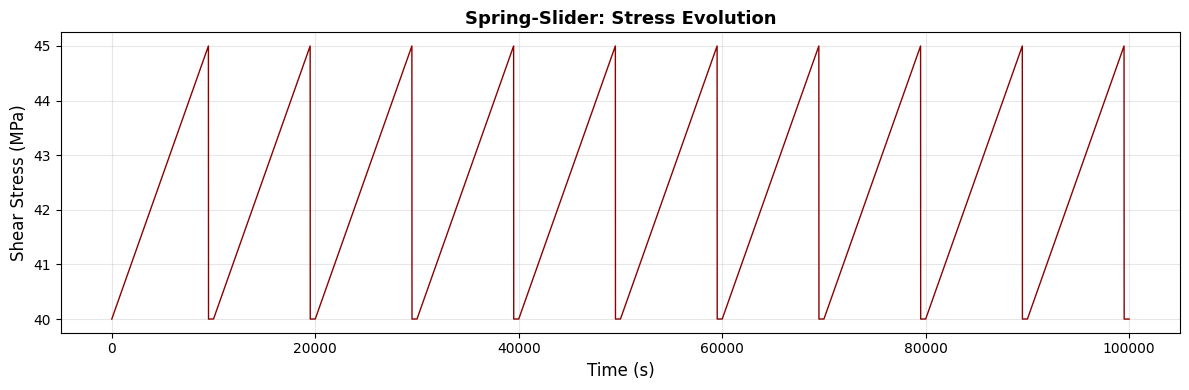


Stress statistics:
  Maximum stress: 45.00 MPa
  Minimum stress: 40.00 MPa
  Stress drop: 5.00 MPa


In [15]:
fig, ax = plt.subplots(figsize=(12, 4))

# Plot shear stress
ax.plot(data['time'], data['stress']/1e6, linewidth=1, color='darkred')

ax.set_xlabel('Time (s)', fontsize=12)
ax.set_ylabel('Shear Stress (MPa)', fontsize=12)
ax.set_title('Spring-Slider: Stress Evolution', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate stress drop
stress_max = np.max(data['stress'])
stress_min = np.min(data['stress'])
stress_drop = stress_max - stress_min

print(f"\nStress statistics:")
print(f"  Maximum stress: {stress_max/1e6:.2f} MPa")
print(f"  Minimum stress: {stress_min/1e6:.2f} MPa")
print(f"  Stress drop: {stress_drop/1e6:.2f} MPa")

**Plot 3: Phase Diagram (Slip Rate vs Stress)**

The phase portrait reveals the limit cycle behavior and the relationship between stress and slip velocity during the earthquake cycle.

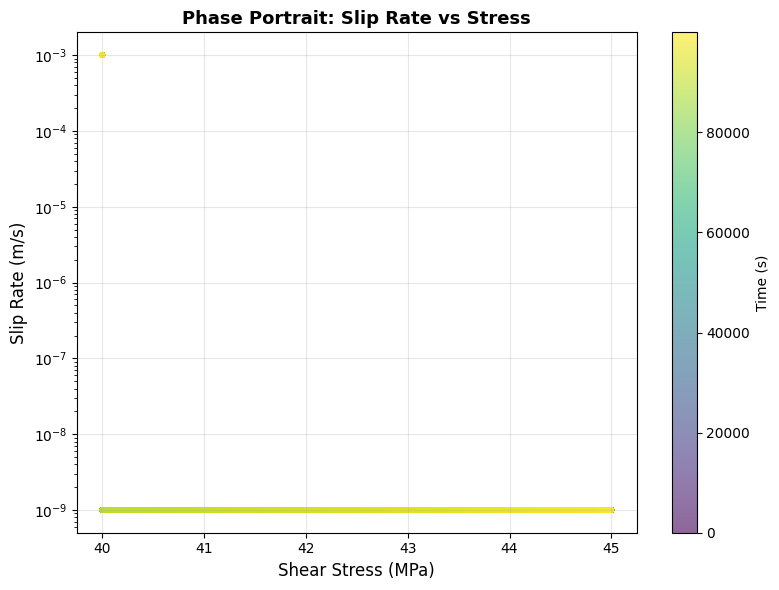


**Interpretation:**
  - The closed loop indicates periodic stick-slip cycles
  - Counterclockwise motion: stress builds → slip accelerates → stress drops → slip decelerates
  - Multiple loops = multiple earthquake cycles


In [16]:
fig, ax = plt.subplots(figsize=(8, 6))

# Color points by time to show evolution
colors = data['time']
scatter = ax.scatter(data['stress']/1e6, data['slip_rate'], 
                     c=colors, cmap='viridis', s=10, alpha=0.6)

ax.set_xlabel('Shear Stress (MPa)', fontsize=12)
ax.set_ylabel('Slip Rate (m/s)', fontsize=12)
ax.set_yscale('log')
ax.set_title('Phase Portrait: Slip Rate vs Stress', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3)

# Add colorbar to show time progression
cbar = plt.colorbar(scatter, ax=ax, label='Time (s)')

plt.tight_layout()
plt.show()

print("\n**Interpretation:**")
print("  - The closed loop indicates periodic stick-slip cycles")
print("  - Counterclockwise motion: stress builds → slip accelerates → stress drops → slip decelerates")
print("  - Multiple loops = multiple earthquake cycles")